In [3]:
import pandas as pd 
# import the csv file 
input_file = 'Wholesale_customers_data.csv' 
wholesale = pd.read_csv(input_file) 
wholesale.head(5) 


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
#More info about data including mean, min, etc.
wholesale.describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
#Max and min values for each
for i in ['Fresh','Milk','Grocery','Frozen','Detergents_Paper',
          'Delicassen']: print('Maximum of ',i, ' is',
        wholesale[i].max(), ' while mean value is ',wholesale[i].mean())


Maximum of  Fresh  is 112151  while mean value is  12000.297727272728
Maximum of  Milk  is 73498  while mean value is  5796.265909090909
Maximum of  Grocery  is 92780  while mean value is  7951.277272727273
Maximum of  Frozen  is 60869  while mean value is  3071.931818181818
Maximum of  Detergents_Paper  is 40827  while mean value is  2881.4931818181817
Maximum of  Delicassen  is 47943  while mean value is  1524.8704545454545


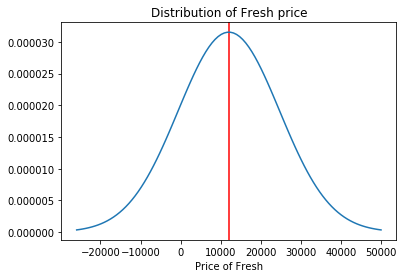

In [8]:
#Fitting normal distribution to one of the variables
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
mu = wholesale['Fresh'].mean() 
sigma = wholesale['Fresh'].std() 
x = np.linspace(mu-3*sigma, mu+3*sigma, 100) 
plt.axvline(x=mu,color='r') 
plt.plot(x, norm.pdf(x,mu,sigma)) 
plt.title('Distribution of Fresh price') 
plt.xlabel('Price of Fresh') 
plt.show()


In [9]:
#Dropping columns/values that are 3 times more the std
import numpy as np 
from scipy import stats 
'''For each column, first it computes the Z-score of each value 
in the column, relative to the column mean and standard deviation. 
Then is takes the absolute of Z-score because the direction does 
not matter, only if it is below the threshold. all(axis=1) ensures 
that for each row, all column satisfy the constraint. Finally, result 
of this condition is used to index the dataframe.''' 
wholesale_new = wholesale[(np.abs(stats.zscore(wholesale)) < 3).all(axis=1)] 
wholesale_new = wholesale_new.drop(['Channel', 'Region'], axis= 1) 
wholesale_new.describe()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,10711.758454,4871.920290,6814.043478,2549.898551,2373.393720,1237.939614
std,9819.217756,4555.665546,6456.160715,2916.683284,3208.707909,1217.399162
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3063.250000,1477.750000,2116.000000,676.750000,252.750000,395.000000
50%,8040.000000,3530.000000,4528.000000,1447.000000,772.000000,881.000000
75%,15657.000000,6908.500000,9762.250000,3204.250000,3660.500000,1681.750000
max,49063.000000,25862.000000,34792.000000,16919.000000,17120.000000,7844.000000


In [13]:
print('Number of dropped instances='
      ,wholesale.shape[0]-wholesale_new.shape[0])


Number of dropped instances= 26


In [14]:
#Design model; implement K means
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=5, random_state=76964057).fit(wholesale_new) 



In [15]:
# Centroids 
kmeans.cluster_centers_


array([[ 5601.90243902, 13389.90243902, 21652.53658537,  1694.12195122,
         9204.        ,  1678.51219512],
       [ 4162.7721519 ,  7627.49367089, 10667.25316456,  1331.39240506,
         4609.58227848,  1411.5443038 ],
       [ 5043.85416667,  2312.11805556,  2759.42361111,  2584.42361111,
          651.02777778,   838.83333333],
       [31873.80434783,  4961.95652174,  5597.04347826,  4014.2173913 ,
         1002.43478261,  1790.39130435],
       [16188.66346154,  2925.21153846,  4189.67307692,  3117.38461538,
          973.11538462,  1240.63461538]])

In [16]:
pd.DataFrame(data=kmeans.cluster_centers_, 
             columns=['Fresh','Milk','Grocery','Frozen',
                      'Detergents_Paper','Delicassen'])


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,5601.902439,13389.902439,21652.536585,1694.121951,9204.000000,1678.512195
1,4162.772152,7627.493671,10667.253165,1331.392405,4609.582278,1411.544304
2,5043.854167,2312.118056,2759.423611,2584.423611,651.027778,838.833333
3,31873.804348,4961.956522,5597.043478,4014.217391,1002.434783,1790.391304
4,16188.663462,2925.211538,4189.673077,3117.384615,973.115385,1240.634615


In [17]:
pd.Series(kmeans.labels_).value_counts()


2    144
4    104
1     79
3     46
0     41
dtype: int64

In [42]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(wholesale)
data_transformed = mms.transform(wholesale)

In [43]:
Sum_of_squared_distances = []
K = range(2,19)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

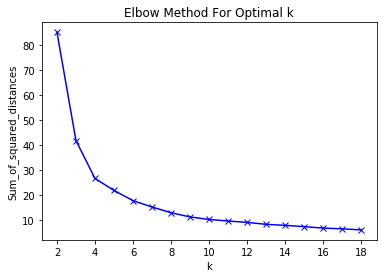

In [44]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#Q1: The best values for "k" is for 3 clusters according to the elbow 
#graph above where the turning point in the curve above starts at 3
#Q2: Each cluster above shows cluster 4 with 144 points,  cluster 3 with 
#104 points, and cluster 2 with 79 points and then drops off in the rest
#of the clusters which matches the elbow graph above